## Classification - CRISP-DM Experiment

**Prompt:** We will be building a machine learning model utilizing the dataset provided to construct a predictive model. The objective of this model is to accurately forecast the likelihood of a heart attack in individuals, as indicated in the column "Output", utilizing key medical parameters. The methodology followed will be CRISP-DM (Cross-industry standard process for data mining), encompassing the following steps: Business Understanding, Data Understanding, Data Preparation, Modeling, and Evaluation.

**ChatGPT:**

**First: Business Understanding**

The primary goal behind building this model is to aid medical professionals in predicting the likelihood of having a heart attack. This is based on various health indicators and parameters already known about the patient. It's crucial to align this project with the CRISP-DM methodology, progressing through these stages:

1. **Business Understanding:** The main objective is to assist medical professionals in predicting heart attack risks using a predictive model.
2. **Data Understanding:** You will provide the data, which we will explore to understand its nature, quality, and the features available for modeling.
3. **Data Preparation:** This involves cleaning and transforming the data to make it suitable for modeling.
4. **Modeling:** We'll select appropriate machine learning algorithms to build the predictive model.
5. **Evaluation:** The model's performance and its ability to accurately predict heart attack risks will be assessed.

Upon receiving the dataset, we can move to the next stage - Data Understanding.

**Provided Data Information:**

- **Age:** Age of the patient
- **Sex:** Sex of the patient
- **exang:** Exercise-induced angina (1 = yes; 0 = no)
- **ca:** Number of major vessels (0-3)
- **cp:** Chest Pain type
   - Value 1: Typical angina
   - Value 2: Atypical angina
   - Value 3: Non-anginal pain
   - Value 4: Asymptomatic
- **trtbps:** Resting blood pressure (in mm Hg)
- **chol:** Cholesterol in mg/dl fetched via BMI sensor
- **fbs:** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **rest_ecg:** Resting electrocardiographic results
   - Value 0: Normal
   - Value 1: Having ST-T wave abnormality
   - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach:** Maximum heart rate achieved
- **target:** Heart attack risk
   - 0 = Less chance of heart attack
   - 1 = More chance of heart attack

We will begin by loading and inspecting the dataset for an initial understanding. Do you want me to proceed with this analysis?


**Prompt:** Yes

**ChatGPT:** (code in the next cell)

In [7]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\youse\OneDrive - NOVAIMS\Thsis kick off\datasets\Classification dataset\heart.csv"  # Replace with your file path
heart_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**ChatGPT:**

## Dataset Overview

The dataset has been successfully loaded. Here's a brief overview based on the first few rows:

- **Columns Information:**
  - `age`: Age of the individual.
  - `sex`: Sex of the individual.
  - `cp`: Types of chest pain.
  - `trtbps`: Resting blood pressure.
  - `chol`: Cholesterol levels.
  - `fbs`: Fasting blood sugar.
  - `restecg`: Resting electrocardiographic results.
  - `thalachh`: Maximum heart rate achieved.
  - `exng`: Exercise induced angina.
  - Other relevant columns.

- **Target Variable:**
  - `output`: Indicates the likelihood of a heart attack.

**Initial Analysis Plan:**

1. Determine the size of the dataset (number of rows and columns).
2. Check for missing values in the dataset.
3. Provide basic statistical descriptions of the dataset.

*Do you want me to proceed with this initial analysis?*

**Prompt:** Yes

**ChatGPT:** (code in the next cell)

In [8]:
# Checking the size of the dataset
dataset_size = heart_data.shape

# Checking for missing values
missing_values = heart_data.isnull().sum()

# Basic statistical description of the dataset
statistical_description = heart_data.describe()

dataset_size, missing_values, statistical_description

((303, 14),
 age         0
 sex         0
 cp          0
 trtbps      0
 chol        0
 fbs         0
 restecg     0
 thalachh    0
 exng        0
 oldpeak     0
 slp         0
 caa         0
 thall       0
 output      0
 dtype: int64,
               age         sex          cp      trtbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg    t

## Initial Analysis Results

### Dataset Size
- The dataset contains **303 rows** and **14 columns**.

### Missing Values
- There are **no missing values** in any of the columns, simplifying the data preparation stage.

### Statistical Description
- **Age**: Ranges from 29 to 77 years, with an average age of about 54 years.
- **Binary Variables**: `sex`, `fbs`, `exng`, and `output`.
- **Other Variables**: Variables like `cp`, `trtbps`, `chol`, `restecg`, `thalachh`, `oldpeak`, `slp`, `caa`, and `thall` vary in ranges and scales.

This provides a good starting point to understand the dataset's structure and the nature of its variables.

### Next Steps
- Explore these variables more deeply, including their distribution and relationship with the target variable (`output`).
- Investigate potential correlations and prepare the data accordingly.

*Do you want me to proceed with a more detailed analysis of the variables and their relationships?*

**Prompt:** Yes

**ChatGPT:** (code in the next cell)

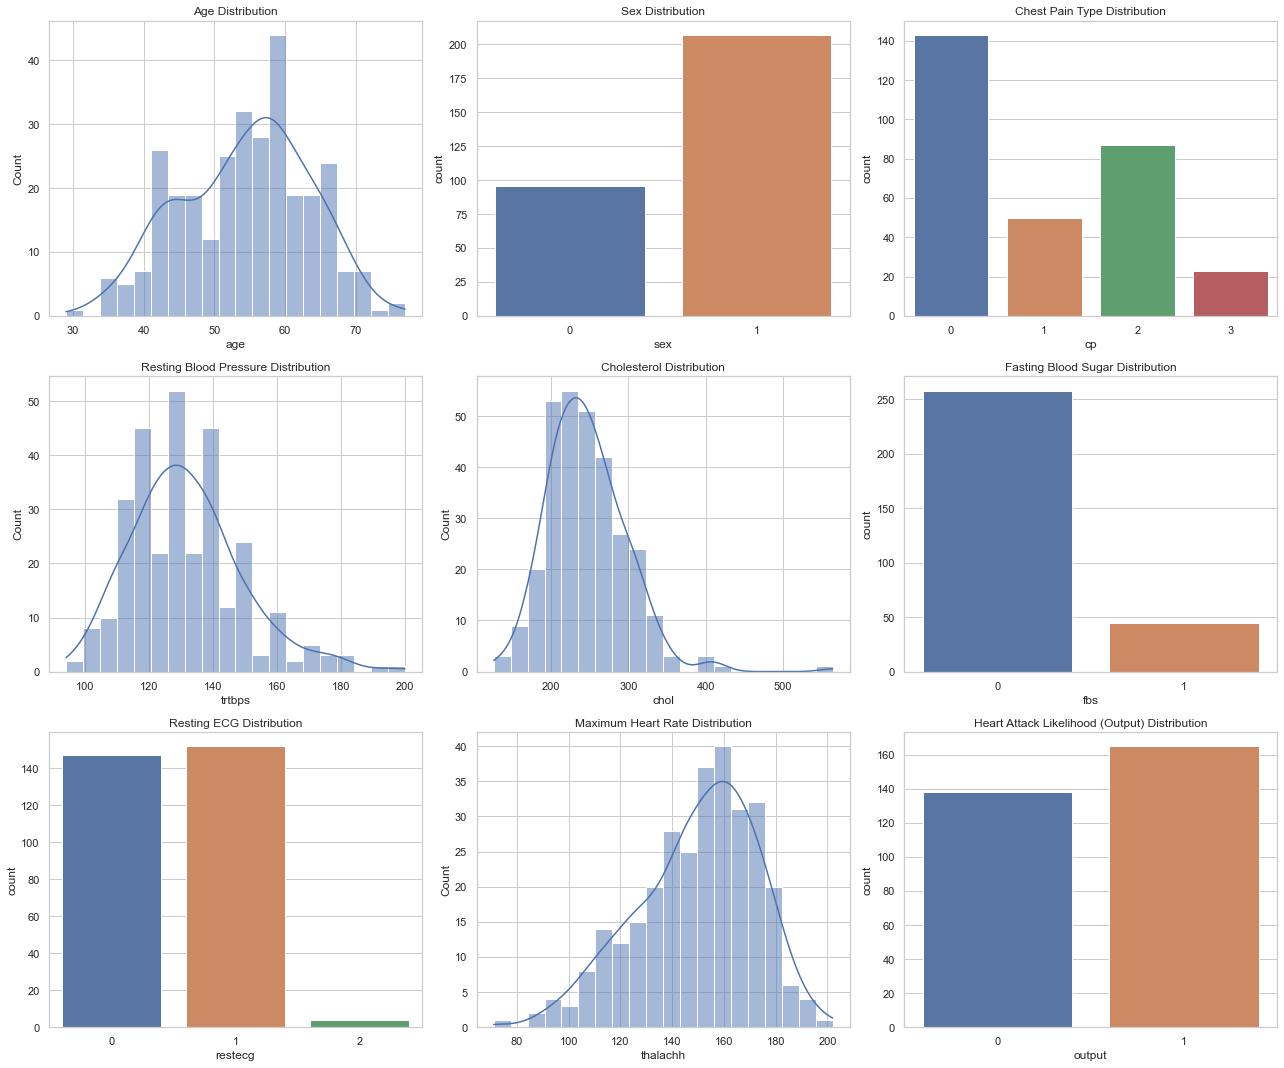

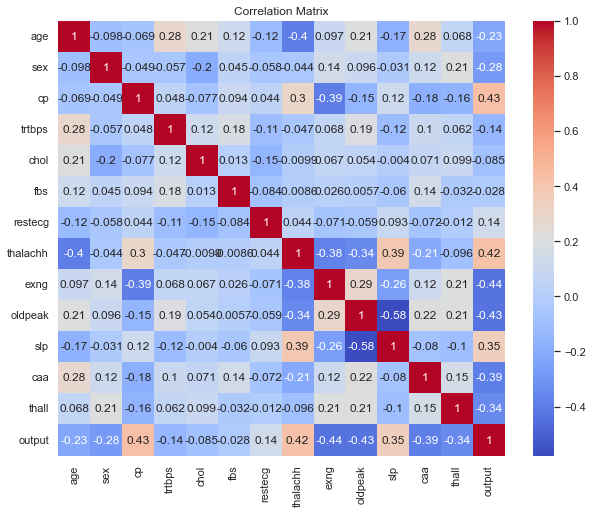

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots for different visualizations
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Age distribution
sns.histplot(heart_data['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Sex distribution
sns.countplot(x='sex', data=heart_data, ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution')

# Chest Pain Type distribution
sns.countplot(x='cp', data=heart_data, ax=axes[0, 2])
axes[0, 2].set_title('Chest Pain Type Distribution')

# Resting Blood Pressure distribution
sns.histplot(heart_data['trtbps'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Resting Blood Pressure Distribution')

# Cholesterol distribution
sns.histplot(heart_data['chol'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Cholesterol Distribution')

# Fasting Blood Sugar distribution
sns.countplot(x='fbs', data=heart_data, ax=axes[1, 2])
axes[1, 2].set_title('Fasting Blood Sugar Distribution')

# Resting ECG distribution
sns.countplot(x='restecg', data=heart_data, ax=axes[2, 0])
axes[2, 0].set_title('Resting ECG Distribution')

# Maximum Heart Rate distribution
sns.histplot(heart_data['thalachh'], bins=20, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Maximum Heart Rate Distribution')

# Target distribution
sns.countplot(x='output', data=heart_data, ax=axes[2, 2])
axes[2, 2].set_title('Heart Attack Likelihood (Output) Distribution')

plt.tight_layout()
plt.show()

# Checking for correlations
correlation_matrix = heart_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**ChatGPT:**

## Visualization Insights

### Age Distribution
- The age of patients is somewhat normally distributed with a slight skew towards older age groups.

### Sex Distribution
- More male patients than female in the dataset.

### Chest Pain Type (cp) Distribution
- Varied number of patients across different types of chest pain, with type 0 being the most common.

### Resting Blood Pressure (trtbps) Distribution
- Somewhat normally distributed.

### Cholesterol (chol) Distribution
- Cholesterol levels follow a normal distribution with a slight right skew.

### Fasting Blood Sugar (fbs) Distribution
- Majority of patients have fasting blood sugar below 120 mg/dl.

### Resting ECG (restecg) Distribution
- Most patients have a type 1 condition, followed by type 0.

### Maximum Heart Rate (thalachh) Distribution
- A wide range of maximum heart rates with a slight left skew.

### Target (Heart Attack Likelihood) Distribution
- Somewhat balanced but slightly skewed towards more likelihood of heart attacks.

### Correlation Matrix
- The heatmap shows correlations between variables. Notably, 'cp', 'thalachh', and 'slp' have a relatively higher positive correlation with the target variable, indicating they might be significant predictors.

This analysis sets a foundation for the next steps, which include data preparation (cleaning, feature selection, encoding categorical variables, etc.) and then moving on to modeling.

*Would you like to proceed with data preparation or discuss any specific aspect of the dataset further?*

**Prompt:** Proceed

**ChatGPT:** 

## Data Preparation Stage

In this stage, we will focus on the following key steps:

### Feature Selection
- **Objective**: Identify the most relevant features for the model.
- **Method**: Based on the correlation matrix and the nature of the data, we'll decide which features to keep.

### Handling Categorical Variables
- **Objective**: Convert categorical variables into a format suitable for machine learning algorithms.
- **Method**: Use methods like one-hot encoding.

### Data Normalization or Standardization
- **Objective**: Adjust the scale of input features for machine learning models.
- **Method**: Apply normalization or standardization techniques.

### Data Splitting
- **Objective**: Split the dataset into training and testing sets.
- **Method**: This helps in evaluating the performance of the model.

*Shall we proceed with these data preparation steps?*

**Prompt:** Yes

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Since the dataset doesn't have any missing values and the features are relevant, we move to the next steps

# Separating the features and the target variable
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Handling Categorical Variables - One-hot Encoding for categorical variables ('cp', 'restecg', 'slp', 'caa', 'thall')
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slp', 'caa', 'thall'], drop_first=True)

# Data Normalization/Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 22), (61, 22), (242,), (61,))

**ChatGPT:**

## Data Preparation Summary

The data preparation stage is now complete, and here's what we have accomplished:

### Feature Selection
- **Decision**: All the original features were retained as they are relevant for the model.

### Handling Categorical Variables
- **Method Applied**: One-hot encoding was applied to categorical variables such as 'cp', 'restecg', 'slp', 'caa', and 'thall'.

### Data Normalization/Standardization
- **Approach**: Standardized the features to ensure equal contribution to the model's performance.

### Data Splitting
- **Distribution**: The dataset was split into training and testing sets, with 242 samples for training and 61 for testing.

## Next Steps: Modeling

With the data prepared, we are now ready to move on to the Modeling stage:

1. **Select a Machine Learning Algorithm**: Choose a suitable algorithm for the classification task.
2. **Train the Model**: Use the training set for model training.
3. **Validate the Model**: Employ the test set to validate the model's performance.

*Common choices for this classification task include Logistic Regression, Random Forest, and Gradient Boosting.*

*Would you like to proceed with a specific model, or should I select one based on common practices for this type of problem?*



**Prompt:** Proceed with common practices for this type of problem



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting the Random Forest Classifier as it's a robust model for classification problems
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy, conf_matrix, class_report)

0.8688524590163934 [[25  4]
 [ 4 28]]               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



**ChatGPT:**

## Random Forest Classifier Model Evaluation

The Random Forest Classifier model has been trained and evaluated. Here are the key results:

### Accuracy
- **Achieved**: Approximately 86.9% accuracy on the test set.

### Confusion Matrix
- **True Negative (TN)**: 25
- **False Positive (FP)**: 4
- **False Negative (FN)**: 4
- **True Positive (TP)**: 28
- **Insight**: This matrix shows a good balance between correctly predicting heart attack likelihood and minimizing false alarms.

### Classification Report
- **Precision and Recall**: Around 86-88% for both classes (0 and 1).
- **F1-Score**: Also around 86-88%.
- **Observation**: Indicates effective performance of the Random Forest Classifier for this task.

### Opportunities for Improvement
- **Potential Steps**: Tuning the model's hyperparameters, trying different algorithms, or employing ensemble methods.

*Would you like to explore any of these improvement options further, or should we proceed to the final stage of CRISP-DM, which involves the evaluation of the results and the project as a whole?*


**Prompt:** Proceed with the Evaluation 

## CRISP-DM Process: Evaluation Stage

In the Evaluation stage of the CRISP-DM process, we reflect on the entire project, covering all aspects from initial business understanding to the final model performance. Key components of this stage include:

### Assessing Model Performance
- **Model Accuracy**: Our Random Forest model achieved approximately 86.9% accuracy.
- **Precision, Recall, and F1-Score**: Indicate good model performance.
- **Critical Consideration**: The balance between false positives and false negatives, particularly vital in a medical context.

### Business Objective Reassessment
- **Primary Goal**: Aid medical professionals in predicting heart attack risks.
- **Role of the Model**: Provide insights but not act as the sole decision-making tool.
- **Importance**: Integrating clinical judgment and considering medical factors not present in the dataset.

### Project Review
- **Process**: The CRISP-DM process effectively guided the project.
- **Data Quality**: Clean and well-structured data facilitated efficient preparation and modeling.

### Potential Improvements
- **Techniques**: Experiment with different ML models, ensemble methods, or neural networks.
- **Tuning**: Hyperparameter optimization for better performance.
- **Data Expansion**: Inclusion of more diverse patient records could enhance model robustness.

### Concluding Remarks
- **Insight**: Demonstrates the potential of machine learning in healthcare, especially for predictive analytics in heart attack risks.
- **Collaboration**: Working with domain experts (cardiologists, data scientists) for further development and deployment.

### Considerations for Deployment
- **Regulatory Compliance**: Adherence to medical regulations and ethical guidelines.
- **Maintenance**: Continual monitoring and updating with new data for sustained accuracy and relevance.

*Would you like to discuss any specific aspect of the evaluation in more detail, or is there anything else you'd like to explore or ask about the project?*


